In [68]:
from qiskit import *
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram

In [69]:
N = 6

QREG = QuantumRegister(N+1)
CREG = ClassicalRegister(N)

QC = QuantumCircuit(QREG, CREG)

QC.x(N)
QC.barrier()

for i in range(N+1):
    if i % 2 == 0:
        QC.x(i)
    QC.h(i)

QC.barrier()

for i in range(N):
    QC.cx(i,N)

QC.barrier()

for i in range(N+1):
    QC.h(i)

In [70]:
state = Statevector(QC)
state.draw(output="latex", )


<IPython.core.display.Latex object>

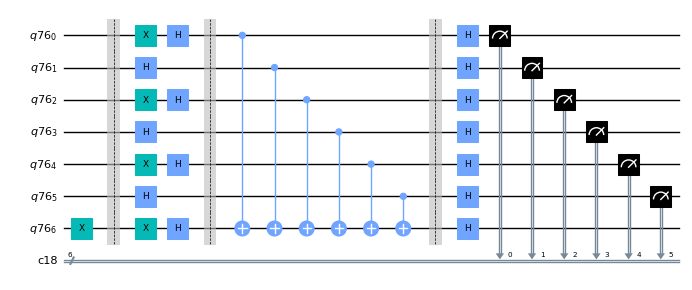

In [71]:
QC.measure(range(N), range(N))
QC.draw(output="mpl", scale=0.5)

Statevector([ 0.00000000e+00+0.000000e+00j,  0.00000000e+00+0.000000e+00j,
              0.00000000e+00+0.000000e+00j,  0.00000000e+00+0.000000e+00j,
              0.00000000e+00+0.000000e+00j,  0.00000000e+00+0.000000e+00j,
              0.00000000e+00+0.000000e+00j,  0.00000000e+00+0.000000e+00j,
              0.00000000e+00+0.000000e+00j,  0.00000000e+00+0.000000e+00j,
              0.00000000e+00+0.000000e+00j,  0.00000000e+00+0.000000e+00j,
              0.00000000e+00+0.000000e+00j,  0.00000000e+00+0.000000e+00j,
              0.00000000e+00+0.000000e+00j,  0.00000000e+00+0.000000e+00j,
              0.00000000e+00+0.000000e+00j,  0.00000000e+00+0.000000e+00j,
              0.00000000e+00+0.000000e+00j,  0.00000000e+00+0.000000e+00j,
              0.00000000e+00+0.000000e+00j,  1.00000000e+00-6.123234e-17j,
             -0.00000000e+00+0.000000e+00j, -0.00000000e+00+0.000000e+00j,
              0.00000000e+00+0.000000e+00j,  0.00000000e+00+0.000000e+00j,
              0.00000000e

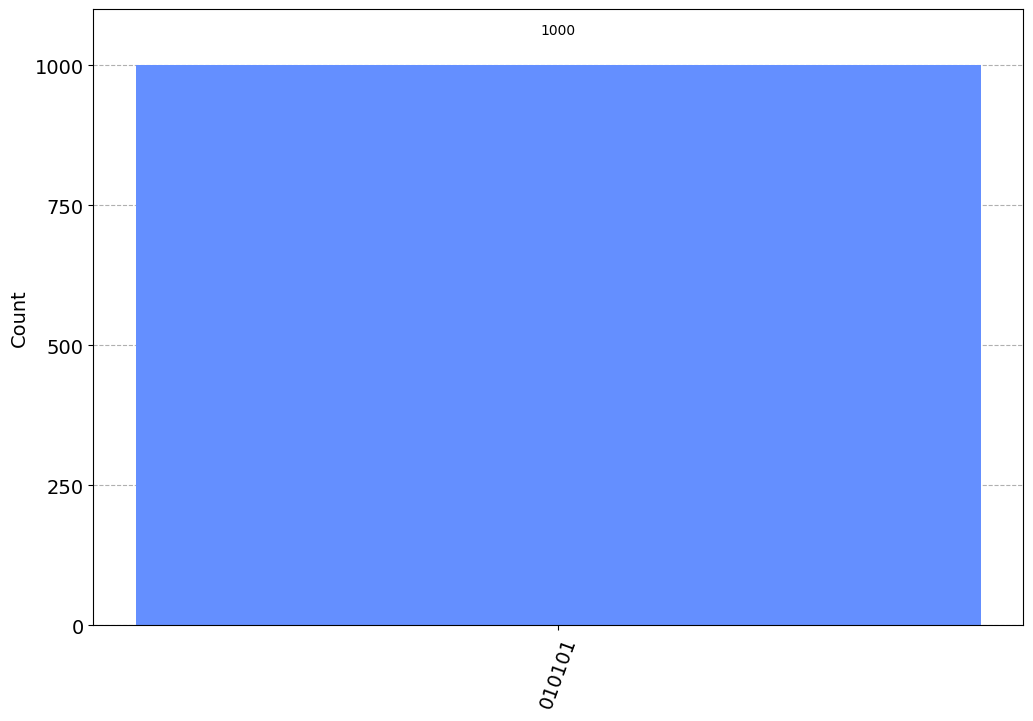

In [72]:
backend = Aer.get_backend('aer_simulator')  # Tell Qiskit how to simulate our circuit

QC.save_statevector()   # Tell simulator to save statevector
result = backend.run(transpile(QC, backend), shots=1000).result()
out_state = result.get_statevector()
print(out_state) # Display the output state vector
plot_histogram(result.get_counts(), figsize=(12,8))